#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problam Statement
- This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.
-  The goal is to predict the probability of credit default based on credit card owner's characteristics and payment history.

### 2) Data collection
- Dataset Source - https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?resource=download
- Dataset consist of 25 columns and 30000 rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2.1 Import the csv dataset as Pandas DataFrame
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
data = pd.read_csv('data/UCI_Credit_Card.csv')

## Top 5 records

In [3]:
pd.options.display.max_columns= None

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [6]:
data.rename(columns={'default.payment.next.month':'default'},inplace=True)

## shape of dataset

In [7]:
data.shape

(30000, 25)

## 2.2 Dataset information

There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## 3.1 check missing values

In [8]:
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

- There is no missing values in dataset

## 3.2 Check Duplicates

In [9]:
data.duplicated().sum()

0

- There is no duplicates values in dataset

## 3.3 Check data types

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

### 3.4 Checking the number of unique values of each column

In [11]:
data.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
default          2
dtype: int64

In [12]:
data.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

### 3.5 Check statistics of data set

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### 3.7 Exploring Data

In [14]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
# define numerical & categorical columns
categorical_feature = [i for i in data.columns if data[i].nunique()<=11]
numeric_feature = [i for i in data.columns if i not in categorical_feature]

In [16]:
# print columns
print('we have {} numerical feature : {}'.format(len(numeric_feature),numeric_feature))
print('\nwe have {} categorical feature : {}'.format(len(categorical_feature), categorical_feature))

we have 15 numerical feature : ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

we have 10 categorical feature : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default']


In [17]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [18]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

We have few values for 0, which are not determined . So I am adding them in Others category.

- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE:  (Marital status (1=married, 2=single, 3=others)

In [19]:
    data.replace({'EDUCATION':{1:1,2:1,3:2,4:3,5:3,6:3,0:3},'MARRIAGE':{1:1,2:2,0:3,3:3}},inplace=True)

# 4. Exploring Data ( Visualization )

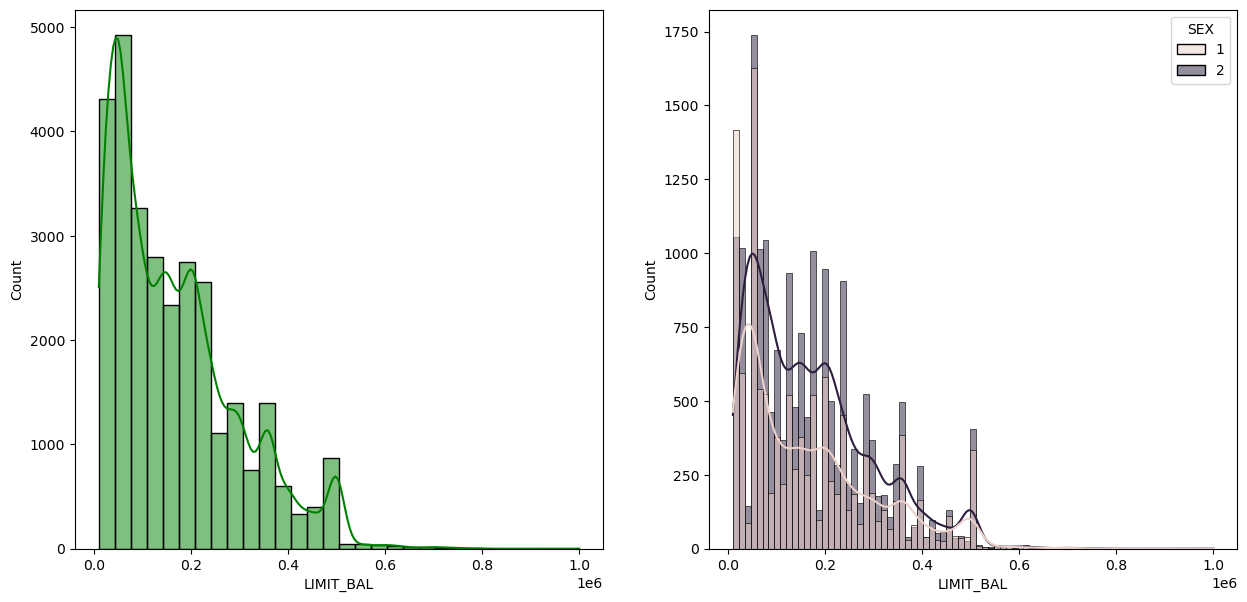

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='LIMIT_BAL',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='LIMIT_BAL',kde=True,hue='SEX')
plt.show()

([<matplotlib.axis.XTick at 0x1705dbe4190>,
 [Text(0, 0, 'male'), Text(1, 0, 'Female')])

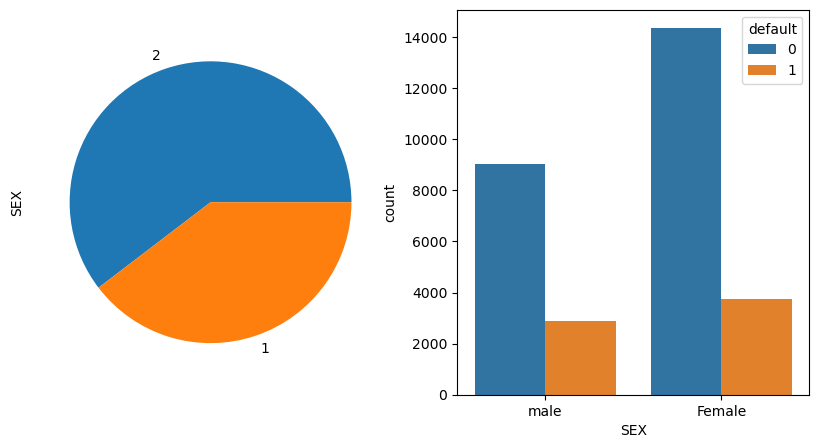

In [21]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
data['SEX'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x = 'SEX', hue = 'default', data = data)
plt.xticks([0,1], ['male', 'Female'])



- There are more females credit card holder,so no. of defaulter have high proportion of females.

([<matplotlib.axis.XTick at 0x1705dd07700>,
 [Text(0, 0, 'Graduate'), Text(1, 0, 'High School'), Text(2, 0, 'Others')])

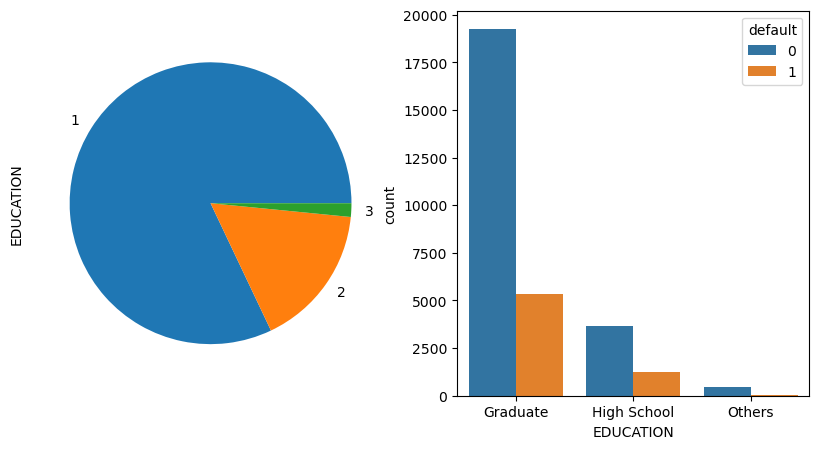

In [22]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
data['EDUCATION'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x = 'EDUCATION', hue = 'default', data = data)
plt.xticks([0,1,2],['Graduate','High School','Others'])

- No. of defaulters have a higher proportion of educated people (graduate school and university)

([<matplotlib.axis.XTick at 0x1705ddbd6d0>,
 [Text(0, 0, 'marride'), Text(1, 0, 'Single'), Text(2, 0, 'Devorcy ')])

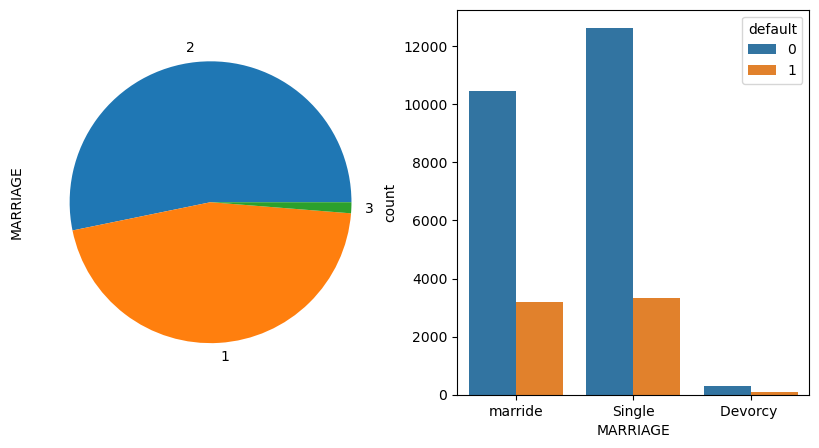

In [23]:
# plt.figure(figsize=(5,5))
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
data['MARRIAGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x = 'MARRIAGE', hue = 'default', data = data)
plt.xticks([0,1,2],['marride','Single','Devorcy ' ])

- No. of defaulters have a higher proportion of Singles.

<AxesSubplot:xlabel='default', ylabel='count'>

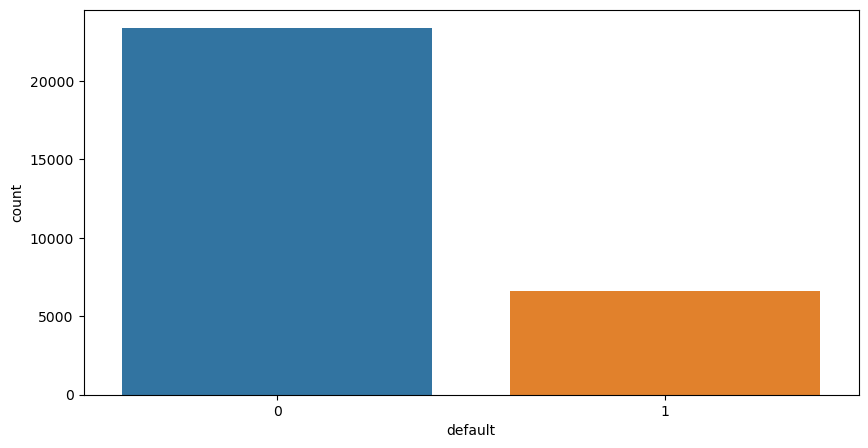

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='default',data=data)

As we can see from above graph that both classes are not in proportion and we have imbalanced dataset.

In [25]:
data['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

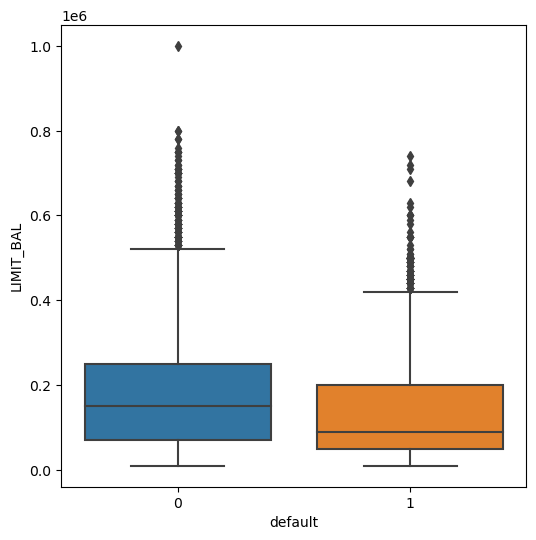

In [26]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x="default", y="LIMIT_BAL", data=data)

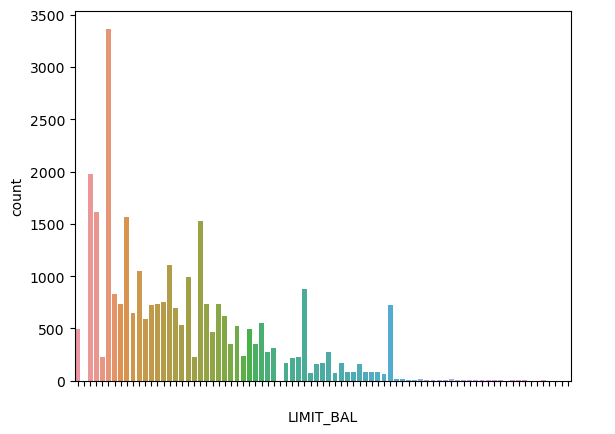

In [27]:
sns.countplot(data.LIMIT_BAL)
plt.xticks(color='w')
plt.show()

- we can see the LIMIT_BAL has distribution 

In [28]:
msk_negative = data[data['default'] == 0]
msk_positive = data[data['default'] == 1]

In [29]:
print(f"data set have 0 labels {len(msk_negative)}")
print(f"\ndata set have 1 labels {len(msk_positive)}")

data set have 0 labels 23364

data set have 1 labels 6636


<Figure size 400x400 with 0 Axes>

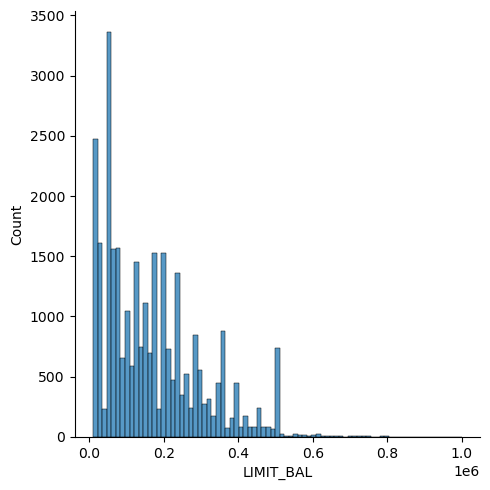

In [30]:
plt.figure(figsize=(4,4))
sns.displot(data.LIMIT_BAL)

- We have more number of clients having limiting balance between 0 to 200000 currency.

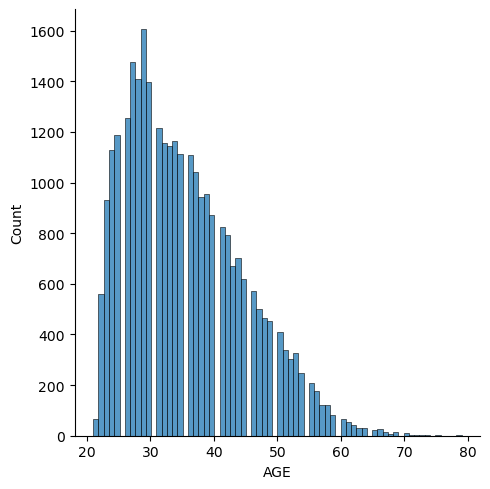

In [31]:
sns.displot(data.AGE)

- We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.
- We will observe the effect of variables on target variable below

<Figure size 1000x500 with 0 Axes>

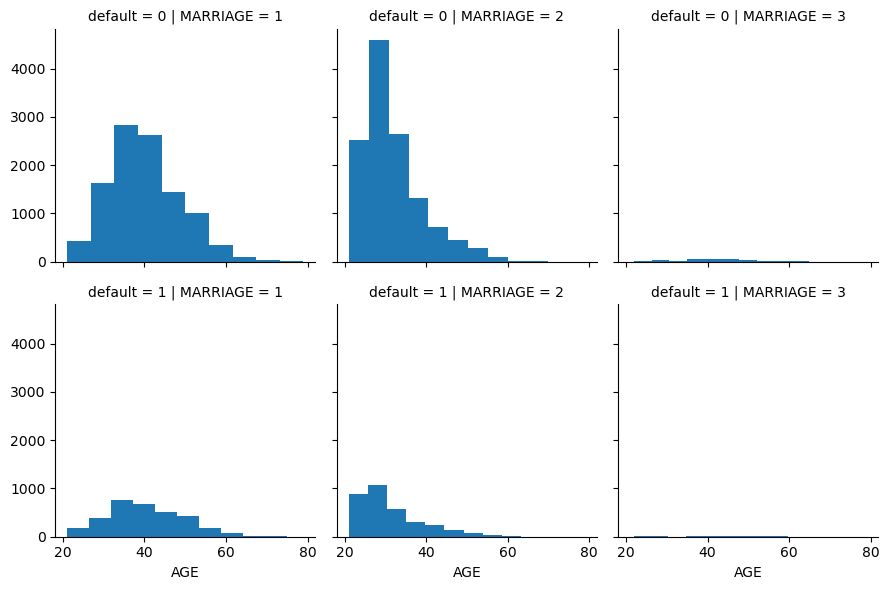

In [32]:
plt.figure(figsize=(10,5))
marr = sns.FacetGrid(data,row='default',col='MARRIAGE')
marr = marr.map(plt.hist,'AGE')
plt.show()

- From above plot we can infer that married people between age bracket of 30 and 50 and unmarried clients of age 20-30 tend to default payment with unmarried clients higher probability to default payment. Hence we can include MARRIAGE feature of clients to find probability of defaulting the payment next month

<Figure size 1000x500 with 0 Axes>

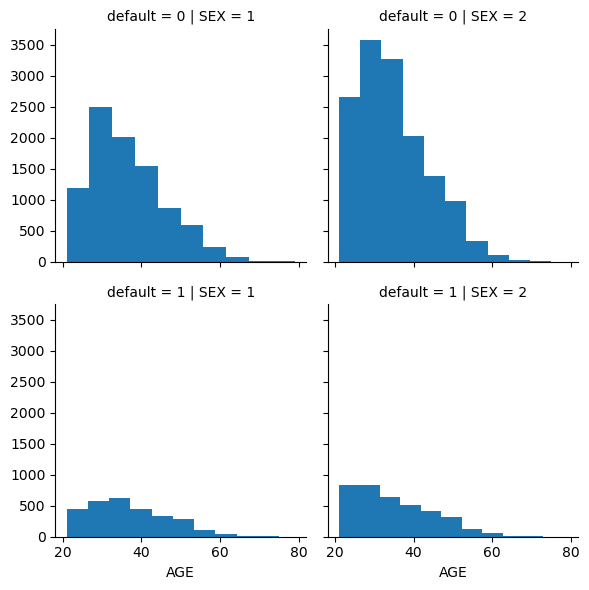

In [33]:
plt.figure(figsize=(10,5))
g = sns.FacetGrid(data, row='default', col='SEX')
g = g.map(plt.hist, 'AGE')

- It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.

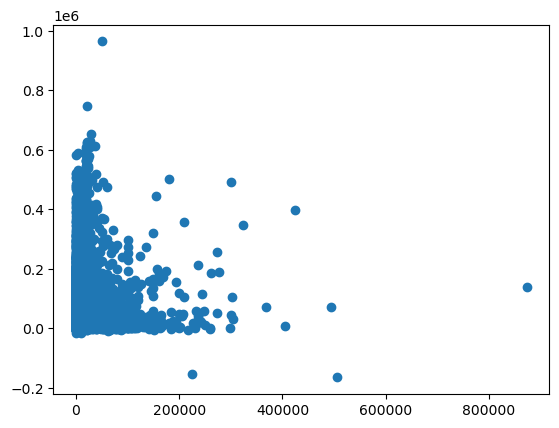

In [34]:
plt.scatter(x=data.PAY_AMT1,y=data.BILL_AMT1)

In [35]:
#renaming columns 

data.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
data.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [38]:
numeric_feature

['ID',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT_SEPT',
 'BILL_AMT_AUG',
 'BILL_AMT_JUL',
 'BILL_AMT_JUN',
 'BILL_AMT_MAY',
 'BILL_AMT_APR',
 'PAY_AMT_SEPT',
 'PAY_AMT_AUG',
 'PAY_AMT_JUL',
 'PAY_AMT_JUN',
 'PAY_AMT_MAY',
 'PAY_AMT_APR']

In [ ]:
data.head()

In [ ]:
bill_amnt_data = data[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

In [ ]:
sns.pairplot(data = bill_amnt_data)

In [ ]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
    plt.figure(figsize=(8,4))
    sns.countplot(x = col, hue = 'default', data = data)

In [ ]:
pay_amnt_data = data[['PAY_AMT_SEPT','PAY_AMT_AUG',	'PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR', 'default']]
sns.pairplot(data = pay_amnt_data, hue='default')